### Sprint 4: Capitulo 1.1 - Trabajar con tipos de datos numéricos y de string

In [2]:
import pandas as pd
import numpy as np

pc_path = "E:\\datasets\\"
laptop_path = "C:\\Users\\jesus\\Documents\\TripleTen\\datasets\\"

df = pd.read_csv(pc_path + "OnlineRetail.csv")

df.info()
print()
print(df.head())
print()

can_convert = np.array_equal(df['Quantity'], df['Quantity'].astype('int'))

print(can_convert)
print()

df['Quantity'] = df['Quantity'].astype('int')

df.info()
print()

df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors = 'coerce')
df.info()

#df['UnitPrice'] = df['UnitPrice'].astype('float')
#df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    50000 non-null  object 
 1   StockCode    50000 non-null  object 
 2   Description  49857 non-null  object 
 3   Quantity     50000 non-null  float64
 4   InvoiceDate  50000 non-null  object 
 5   UnitPrice    50000 non-null  object 
 6   CustomerID   31599 non-null  float64
 7   Country      50000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.1+ MB

  InvoiceNo StockCode                          Description  Quantity  \
0    536520     21123  SET/10 IVORY POLKADOT PARTY CANDLES       1.0   
1    536520     21124   SET/10 BLUE POLKADOT PARTY CANDLES       1.0   
2    536520     21122   SET/10 PINK POLKADOT PARTY CANDLES       1.0   
3    536520     84378        SET OF 3 HEART COOKIE CUTTERS       1.0   
4    536520     21985    PACK OF 12 HEARTS DESIGN TISSUES  

### Sprint 4: Capitulo 1.2 - Trabajar con fechas y horas

In [26]:
import pandas as pd

position = pd.read_csv(pc_path + 'position.csv')

print('Initial data frame: \n', position.head())
print()
position.info()

position['timestamp'] = pd.to_datetime(position['timestamp'], format = '%Y-%m-%dT%H:%M:%S')
print()
print('Data frame after setting timestamp column: \n', position.head())
print()

print('Timestamp column, 5th row: \n', position['timestamp'][4])
print()
print('Timestamp column, 5th row, day attribute: \n', position['timestamp'][4].day)
print()

dt_months = position['timestamp'].dt.month
print('Months of first 5 rows: \n', dt_months.head())
print()

dt_toronto = position['timestamp'].dt.tz_localize('America/Toronto')
print('Toronto localization: \n', dt_toronto.head())
print()

dt_brisbane = dt_toronto.dt.tz_convert('Australia/Brisbane')
print('Conver to Brisbane: \n', dt_brisbane.head())
print()


Initial data frame: 
              timestamp  level   page_id
0  2019-02-04T13:22:34      1  6ukoNykP
1  2019-02-06T15:30:54      1  Q62R1Ue7
2  2019-02-08T14:53:45      1  GmfSxgPs
3  2019-02-10T16:50:22      2  M56OK96C
4  2019-02-12T14:16:28      1  q2fqVqPc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  39 non-null     object
 1   level      39 non-null     int64 
 2   page_id    39 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.0+ KB

Data frame after setting timestamp column: 
             timestamp  level   page_id
0 2019-02-04 13:22:34      1  6ukoNykP
1 2019-02-06 15:30:54      1  Q62R1Ue7
2 2019-02-08 14:53:45      1  GmfSxgPs
3 2019-02-10 16:50:22      2  M56OK96C
4 2019-02-12 14:16:28      1  q2fqVqPc

Timestamp column, 5th row: 
 2019-02-12 14:16:28

Timestamp column, 5th row, day attribute: 
 12

Months of f

### Sprint 4: Capitulo 3.1 - Crear nuevas columnas con base en valores de otras

In [4]:
import pandas as pd

df = pd.read_csv(pc_path + 'vg_sales.csv')

df['average_sales'] = (df['jp_sales'] + df['na_sales'] + df['eu_sales'])/3
df= df.sort_values(by = 'average_sales', ascending = False)

print(df.head())


                       name platform  year_of_release         genre publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   

  developer  na_sales  eu_sales  jp_sales  critic_score user_score  \
0  Nintendo     41.36     28.96      3.77          76.0          8   
1       NaN     29.08      3.58      6.81           NaN        NaN   
2  Nintendo     15.68     12.76      3.79          82.0        8.3   
4       NaN     11.27      8.89     10.22           NaN        NaN   
3  Nintendo     15.61     10.93      3.28          80.0          8   

   average_sales  
0      24.696667  
1      13.156667  
2      10.743333  
4      10.126667

### Sprint 4: Capitulo 3.2 - Crear columnas categóricas con apply()

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv(pc_path + 'vg_sales.csv')

df_year_of_release = df['year_of_release'].value_counts()
print('Value counts: \n', df_year_of_release.head(10))
print()

def score_group(score):
    if score < 60:
        return 'low'
    elif score < 80:
        return 'medium'
    elif score >= 80 :
        return 'high'
    else:
        return 'no score'
    

print('Score group for a score of 10: ', score_group(10))
print('Score group for a score of 65: ', score_group(65))
print('Score group for a score of 99: ', score_group(99))
print('Score group for NaN: ', score_group(np.nan))
print()

df['score_categorized'] = df['critic_score'].apply(score_group)
print(df.head())
print()

df_grouped_score = df.groupby('score_categorized')['score_categorized'].count()
print(df_grouped_score)
print()

df_grouped = df.groupby('score_categorized')
df_sum = df_grouped['na_sales'].sum()
print('Sum of categories for North America sales: \n', df_sum)



Value counts: 
 year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
Name: count, dtype: int64

Score group for a score of 10:  low
Score group for a score of 65:  medium
Score group for a score of 99:  high
Score group for NaN:  no score

                       name platform  year_of_release         genre publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

  developer  na_sales  eu_sales  jp_sales  critic_score user_score  \
0  Nintendo     41.36     28.96      3.77          76.0          8   
1       NaN     29.0

### Sprint 4: Capitulo 3.3 - Crear categorías con funciones de fila

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(pc_path + 'vg_sales.csv')
df.dropna(inplace=True)

def avg_score_group(row):

    user_score = pd.to_numeric(row['user_score'])
    critic_score = row['critic_score']

    average_score = (user_score * 10 + critic_score )/2

    if average_score < 60:
        return 'low'
    if average_score >= 60 and average_score < 79:
        return 'medium'
    if average_score > 80:
        return 'high'
  
col_names = ['critic_score', 'user_score']
test_low  = pd.Series([10, 1.0], index=col_names)
test_med  = pd.Series([65, 6.5], index=col_names)
test_high = pd.Series([99, 9.9], index=col_names)

rows = [test_low, test_med, test_high]

for row in rows:
    print(avg_score_group(row))

print()

cols = ['critic_score', 'user_score']
row_1 = pd.Series([66, 3.6], index = cols)
row_2 = pd.Series([72, 8.1], index = cols)
row_3 = pd.Series([99, 9.4], index = cols)
    
print(avg_score_group(row_1))
print(avg_score_group(row_2))
print(avg_score_group(row_3))
print()

#tbd values in user_score columns
#df['game_average_score'] = df.apply(avg_score_group, axis = 1)
#print(df.sample(5), random_state = 321)

low
medium
high

low
medium
high



### Sprint 4: Capitulo 4.1 - Procesamiento de datos agrupados con agg()

In [7]:
import pandas as pd

df = pd.read_csv(pc_path + 'vg_sales.csv')
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
df.dropna(inplace = True)


mean_score = df.groupby('genre')['critic_score'].mean()
print(mean_score)
print()

grp = df.groupby(['platform', 'genre'])
print(grp['critic_score'].mean())
print()

agg_dict = {'critic_score': 'mean', 'jp_sales': 'sum'}

grp = df.groupby(['platform', 'genre'])
print(grp.agg(agg_dict))
print()

def double_it(sales):
    sales = sales.sum() * 2 # multiplica la suma anterior por 2
    return sales

agg_dict = {'jp_sales': double_it}
grp = df.groupby(['platform', 'genre'])
print(grp.agg(agg_dict))

genre
Action          66.701897
Adventure       65.229299
Fighting        69.158416
Misc            66.608696
Platform        68.173824
Puzzle          67.152778
Racing          68.068245
Role-Playing    72.655267
Shooter         70.260022
Simulation      68.567723
Sports          71.972318
Strategy        72.282313
Name: critic_score, dtype: float64

platform  genre       
3DS       Action          62.982759
          Adventure       67.500000
          Fighting        68.857143
          Misc            69.100000
          Platform        72.444444
                            ...    
XOne      Role-Playing    80.777778
          Shooter         77.656250
          Simulation      59.000000
          Sports          71.093750
          Strategy        70.000000
Name: critic_score, Length: 197, dtype: float64

                       critic_score  jp_sales
platform genre                               
3DS      Action           62.982759      6.60
         Adventure        67.500000     

In [8]:
import pandas as pd

df = pd.read_csv(pc_path + 'vg_sales.csv')
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

grp = df.groupby('genre')

agg_dict = {'total_sales': 'sum', 'na_sales': 'mean', 'eu_sales': 'mean', 'jp_sales': 'mean'} # escribe aquí tu diccionario con cuatro tuplas, una por cada variable

genre = grp.agg(agg_dict) # utiliza aquí la función agg

# muestra aquí los resultados
print(genre)

              total_sales  na_sales  eu_sales  jp_sales
genre                                                  
Action            1559.58  0.260834  0.154045  0.047905
Adventure          221.10  0.080783  0.048764  0.040138
Fighting           411.17  0.263086  0.118174  0.103039
Misc               728.12  0.232726  0.121566  0.061777
Platform           776.68  0.501689  0.225619  0.147331
Puzzle             230.19  0.211845  0.086224  0.098810
Racing             652.57  0.287710  0.189359  0.045404
Role-Playing       874.98  0.220540  0.125807  0.236973
Shooter            948.34  0.447649  0.239864  0.029297
Simulation         359.51  0.208455  0.129886  0.072998
Sports            1196.76  0.291495  0.160473  0.057726
Strategy           163.38  0.100366  0.066135  0.072709


### Sprint 4: Capitulo 4.2 - Tablas dinámicas

In [9]:
import pandas as pd

df = pd.read_csv(pc_path + 'vg_sales.csv')
df.dropna(inplace=True)

pivot_data = df.pivot_table(index='genre',
                            columns='platform',
                            values='eu_sales',
                            aggfunc='sum'
                           )
print('Total sales in Europe for particular genre and platform: \n\n', pivot_data)
print()
print(type(pivot_data))
print()

df = df[df['year_of_release'] >= 2000]

df_pivot = df.pivot_table(index = 'genre',
                         columns = 'year_of_release',
                         values = 'jp_sales',
                         aggfunc = 'mean')

print('Dynamic table for mean japanese sales per genre for releases after 2000: \n\n', df_pivot)

Total sales in Europe for particular genre and platform: 

 platform       3DS    DC     DS    GBA    GC     PC     PS    PS2    PS3  \
genre                                                                      
Action        8.50   NaN  13.98   9.13  6.48  15.32  21.61  64.09  94.27   
Adventure     0.50  0.24   3.11   1.36  1.04   1.60   0.35   3.38   6.34   
Fighting      0.84  0.00   0.28   0.90  2.79   0.11   5.83  16.07  13.69   
Misc          1.21   NaN  25.46   2.86  2.15   1.19   1.73  14.57   8.24   
Platform      8.41  0.00  14.17  12.57  5.62   0.33   6.09  17.13   7.26   
Puzzle        1.05   NaN  19.86   1.98  0.76   0.13   0.10   1.57   0.04   
Racing        4.45  0.00   8.49   4.03  2.32   2.59  14.46  38.73  28.12   
Role-Playing  3.10  0.00   6.04   3.99  2.37  24.32   8.70  16.36  16.81   
Shooter       0.27  0.00   0.44   0.69  2.79  18.28   2.34  31.91  65.43   
Simulation    4.40  0.00  13.17   0.58  1.74  22.35   0.79  10.44   2.82   
Sports        0.61  0.05   2

### Sprint 4: Capitulo 4.3 - Combinar DataFrames con concat()

In [10]:
import pandas as pd

df = pd.read_csv(pc_path + 'vg_sales.csv')

mean_score = df.groupby('publisher')['critic_score'].mean()

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']
num_sales = df.groupby('publisher')['total_sales'].sum()

df_concat = pd.concat([mean_score, num_sales], axis='columns')
df_concat.columns = ['avg_critic_score', 'total_sales']
print(df_concat)
print()

rpgs = df[df['genre'] == 'Role-Playing']
platformers = df[df['genre'] == 'Platform']

df_concat = pd.concat([rpgs, platformers])
print(df_concat[['name', 'genre']])

                              avg_critic_score  total_sales
publisher                                                  
10TACLE Studios                      42.000000         0.11
1C Company                           73.000000         0.08
20th Century Fox Video Games               NaN         1.92
2D Boy                               90.000000         0.03
3DO                                  57.470588         9.52
...                                        ...          ...
id Software                          85.000000         0.02
imageepoch Inc.                            NaN         0.04
inXile Entertainment                 81.000000         0.09
mixi, Inc                                  NaN         0.87
responDESIGN                               NaN         0.13

[581 rows x 2 columns]

                                                   name         genre
4                              Pokemon Red/Pokemon Blue  Role-Playing
12                          Pokemon Gold/Pokemon Silver

In [11]:
import pandas as pd

df = pd.read_csv(pc_path + 'vg_sales.csv')
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

total_sales = df.groupby('platform')['total_sales'].sum()
num_pubs = df.groupby('platform')['publisher'].nunique()

print(num_pubs)
print()

platforms = pd.concat([total_sales, num_pubs], axis = 'columns')
platforms.columns = ['total_sales', 'num_publishers']
print(platforms)



platform
2600     26
3DO       3
3DS      82
DC       15
DS      175
GB       17
GBA      87
GC       52
GEN       7
GG        1
N64      54
NES      12
NG        3
PC      133
PCFX      1
PS      151
PS2     172
PS3     103
PS4      75
PSP     127
PSV      66
SAT      44
SCD       1
SNES     50
TG16      2
WS        2
Wii     113
WiiU     23
X360    102
XB       73
XOne     46
Name: publisher, dtype: int64

          total_sales  num_publishers
platform                             
2600            96.07              26
3DO              0.10               3
3DS            245.64              82
DC              15.68              15
DS             747.13             175
GB             247.26              17
GBA            310.12              87
GC             193.75              52
GEN             27.46               7
GG               0.04               1
N64            214.30              54
NES            245.74              12
NG               1.44               3
PC             237

### Sprint 4: Capitulo 4.4 - Combinar DataFrames con merge()

In [12]:
import pandas as pd

first_pupil_df = pd.DataFrame(
    {
        'author': ['Alcott', 'Fitzgerald', 'Steinbeck', 'Twain', 'Hemingway'],
        'title': ['Little Women',
                  'The Great Gatsby',
                  'Of Mice and Men',
                  'The Adventures of Tom Sawyer',
                  'The Old Man and the Sea'
                 ],
    }
)
second_pupil_df = pd.DataFrame(
    {
        'author': ['Steinbeck', 'Twain', 'Hemingway', 'Salinger', 'Hawthorne'],
        'title': ['East of Eden',
                  'The Adventures of Huckleberry Finn',
                  'For Whom the Bell Tolls',
                  'The Catcher in the Rye',
                  'The Scarlett Letter'
                 ],
    }
)

print(first_pupil_df)
print()
print(second_pupil_df)
print()

both_pupils = first_pupil_df.merge(second_pupil_df, on='author')
print(both_pupils) 
print()

both_pupils = first_pupil_df.merge(second_pupil_df, on = 'author', how = 'outer')
print(both_pupils)
print()

both_pupils = first_pupil_df.merge(second_pupil_df, on = 'author', how = 'left')
print(both_pupils)
print()

both_pupils = first_pupil_df.merge(second_pupil_df, on = 'author', suffixes = ('_1st_student', '_2nd_student'))
print(both_pupils)

       author                         title
0      Alcott                  Little Women
1  Fitzgerald              The Great Gatsby
2   Steinbeck               Of Mice and Men
3       Twain  The Adventures of Tom Sawyer
4   Hemingway       The Old Man and the Sea

      author                               title
0  Steinbeck                        East of Eden
1      Twain  The Adventures of Huckleberry Finn
2  Hemingway             For Whom the Bell Tolls
3   Salinger              The Catcher in the Rye
4  Hawthorne                 The Scarlett Letter

      author                       title_x                             title_y
0  Steinbeck               Of Mice and Men                        East of Eden
1      Twain  The Adventures of Tom Sawyer  The Adventures of Huckleberry Finn
2  Hemingway       The Old Man and the Sea             For Whom the Bell Tolls

       author                       title_x  \
0      Alcott                  Little Women   
1  Fitzgerald              Th

In [13]:
import pandas as pd

first_pupil_df = pd.DataFrame(
    {
        'authors': ['Alcott', 'Fitzgerald', 'Steinbeck', 'Twain', 'Hemingway'],
        'title': ['Little Women',
                  'The Great Gatsby',
                  'Of Mice and Men',
                  'The Adventures of Tom Sawyer',
                  'The Old Man and the Sea'
                 ],
    }
)
second_pupil_df = pd.DataFrame(
    {
        'author': ['Steinbeck', 'Twain', 'Hemingway', 'Salinger', 'Hawthorne'],
        'title': ['East of Eden',
                  'The Adventures of Huckleberry Finn',
                  'For Whom the Bell Tolls',
                  'The Catcher in the Rye',
                  'The Scarlett Letter'
                 ],
    }
)

both_pupils = first_pupil_df.merge(second_pupil_df,
                                   left_on='authors',
                                   right_on='author'
                                  )
print(both_pupils)
print()
print(both_pupils.drop('author', axis = 'columns'))

     authors                       title_x     author  \
0  Steinbeck               Of Mice and Men  Steinbeck   
1      Twain  The Adventures of Tom Sawyer      Twain   
2  Hemingway       The Old Man and the Sea  Hemingway   

                              title_y  
0                        East of Eden  
1  The Adventures of Huckleberry Finn  
2             For Whom the Bell Tolls  

     authors                       title_x                             title_y
0  Steinbeck               Of Mice and Men                        East of Eden
1      Twain  The Adventures of Tom Sawyer  The Adventures of Huckleberry Finn
2  Hemingway       The Old Man and the Sea             For Whom the Bell Tolls


In [14]:
import pandas as pd

df_members = pd.read_csv(pc_path + 'new_members.csv')
df_orders  = pd.read_csv(pc_path + 'recent_orders.csv')

print(df_members.head(10))
print(df_orders.head(10))
print()

df_merged = df_members.merge(df_orders, 
                             left_on = 'id', 
                             right_on = 'user_id',
                             suffixes = ('_member', '_order'))
print(df_merged.head(10))
print()

df_merged = df_merged.drop('user_id', axis = 'columns')
print(df_merged.head(10))



     id       username date_joined
0  9832  monkeycool447  2021-06-19
1  9833      Appl3Girl  2021-06-19
2  9834       hiiml00t  2021-06-19
3  9835       jd663366  2021-06-19
4  9836   watermelon89  2021-06-19
5  9837        SUPERXD  2021-06-19
6  9838    aasmith0909  2021-06-19
7  9839     NotHotDog2  2021-06-20
8  9840       starrats  2021-06-20
9  9841      beat1box2  2021-06-20
          id  user_id    service_id      order_timestamp
0  163548290     9836  XMD8nVShpINn  2021-06-22Z18:32:59
1  163548291     9836  PXAQ9MiP7BvW  2021-06-22Z18:32:59
2  163548292     8725  ikNjwXadFlDy  2021-06-22Z18:33:19
3  163548293     9840  9KyrlovWf2nH  2021-06-22Z18:34:00
4  163548294     9121  WXoCdFvGgXmb  2021-06-22Z18:35:16
5  163548295     9121  idVIMieuoAMU  2021-06-22Z18:35:16
6  163548296     9121  CC4F1NgnYGs3  2021-06-22Z18:35:16
7  163548297     9839  NvwWjzW7FydE  2021-06-22Z18:36:21
8  163548298     9841  fCobsButtJD7  2021-06-22Z18:36:55
9  163548299     9837  R2GA1xIVXK1o  2021-06-

### Sprint 4: Capitulo 5.1 - Crear gráficas en Python con matplotlib

   a   b
0  2   4
1  3   9
2  4  16
3  5  25


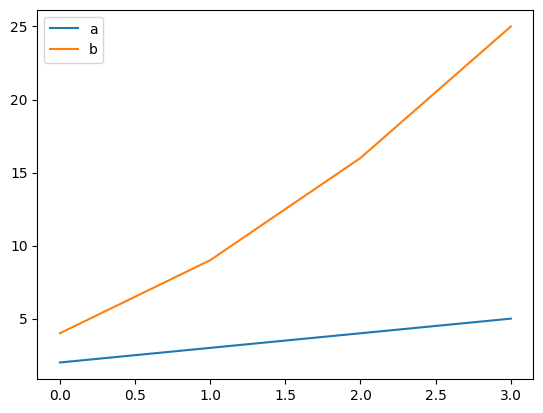

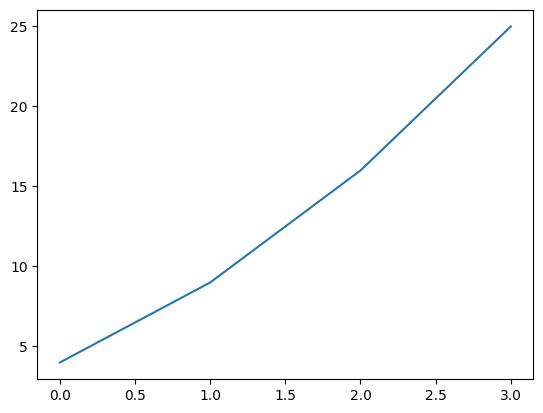

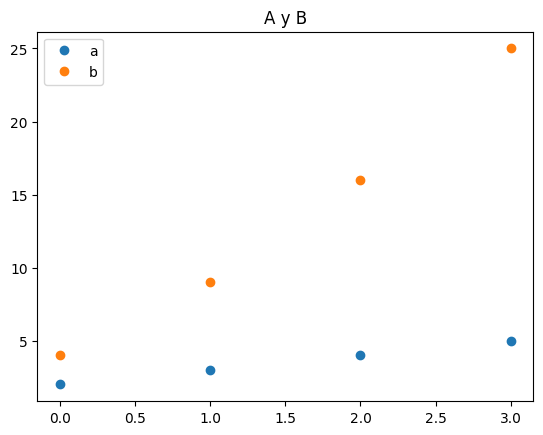

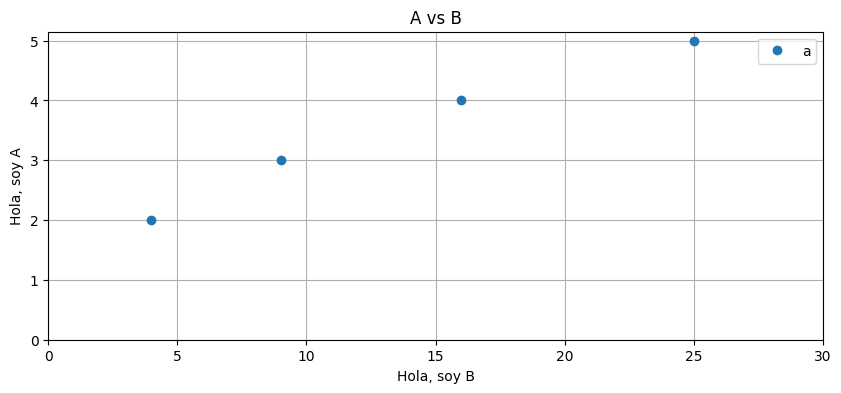

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'a':[2, 3, 4, 5], 'b':[4, 9, 16, 25]})
print(df)

df.plot()
plt.show()

df['b'].plot()
plt.savefig('myplot.png')

#style='o', 'x', 'o-'
df.plot(title='A y B', style='o')
plt.show()

#Columna 'a' está en el eje Y y la columna 'b' está en el eje X
df.plot(x='b', 
        y='a', 
        title='A vs B', 
        style='o', 
        xlabel="Hola, soy B", 
        ylabel = "Hola, soy A", 
        xlim = [0, 30],
        ylim = 0,
        grid = True,
        figsize=[10, 4])
plt.show()

#Alternativa para setear las leyendas de los ejes
#plt.xlabel("Hola, soy B") # configurando la leyenda x
#plt.ylabel("Hola, soy A") # configurando la leyenda y

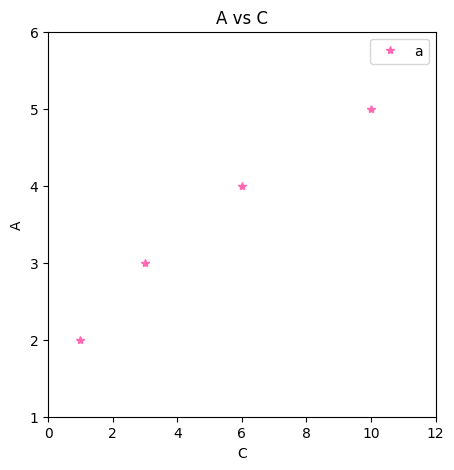

In [16]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'a':[2, 3, 4, 5], 'b':[4, 9, 16, 25], 'c':[1, 3, 6, 10]})

df.plot(x = 'c',
        y = 'a',
        title = 'A vs C',
        style = '*',
        color = 'hotpink',
        figsize = [5, 5],
        xlim = [0, 12],
        ylim = [1, 6],
        xlabel = "C",
        ylabel = "A")

plt.show()

### Sprint 4: Capitulo 5.2 - Gráficos de dispersión

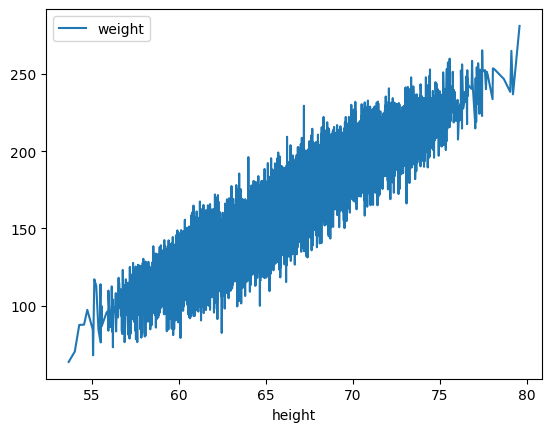

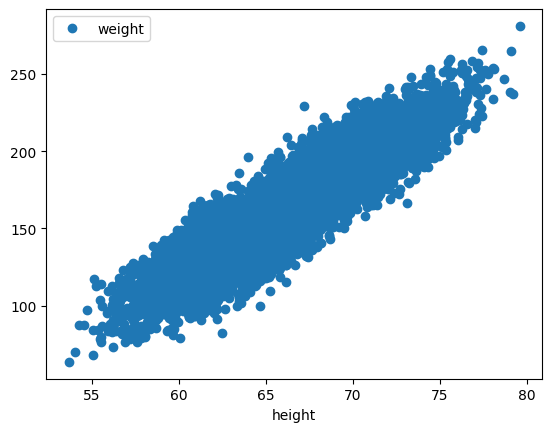

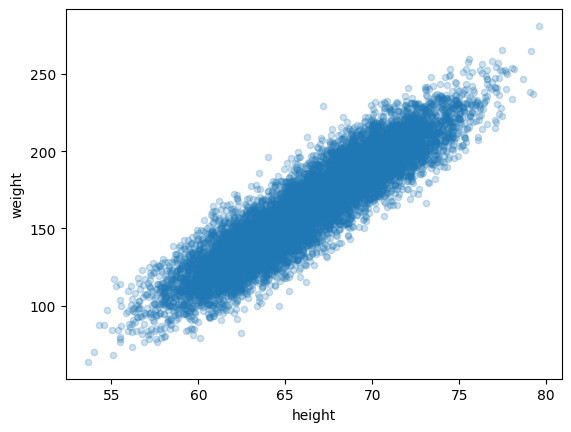

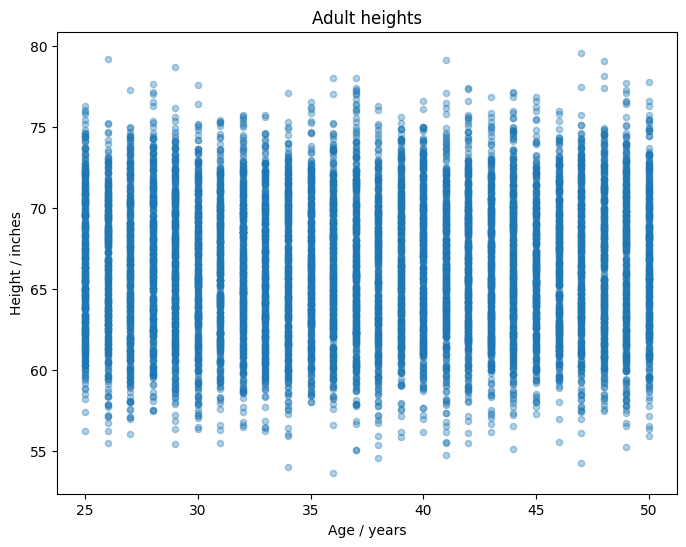

In [17]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'height_weight.csv')

df.sort_values('height').plot(x='height', y='weight')
plt.show()

df.plot(x = 'height', y = 'weight', style = 'o')
plt.show()

#Mejor forma para crear un diagrama de dispersión
df.plot(x='height', y='weight', kind='scatter', alpha = 0.22)
plt.show()

df.plot(x = 'age', 
        y = 'height', 
        kind = 'scatter', 
        title = 'Adult heights', 
        alpha = 0.36, 
        figsize = (8, 6), 
        xlabel = 'Age / years', 
        ylabel = 'Height / inches')

plt.show()

### Sprint 4: Capitulo 5.3 - Correlación

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'height_weight.csv')

print('Correlation betwen height and weight: ', df['height'].corr(df['weight']))
print()

ah_corr = df['height'].corr(df['age'])
print('Correlation between height and age: ', ah_corr)
print()

print(df.corr())

Correlation betwen height and weight:  0.9165261045538688

Correlation between height and age:  0.010042046516844347

          height    weight       age      male
height  1.000000  0.916526  0.010042  0.760690
weight  0.916526  1.000000  0.228538  0.785218
age     0.010042  0.228538  1.000000  0.004750
male    0.760690  0.785218  0.004750  1.000000


### Sprint 4: Capitulo 5.4 - Matrices de dispersión

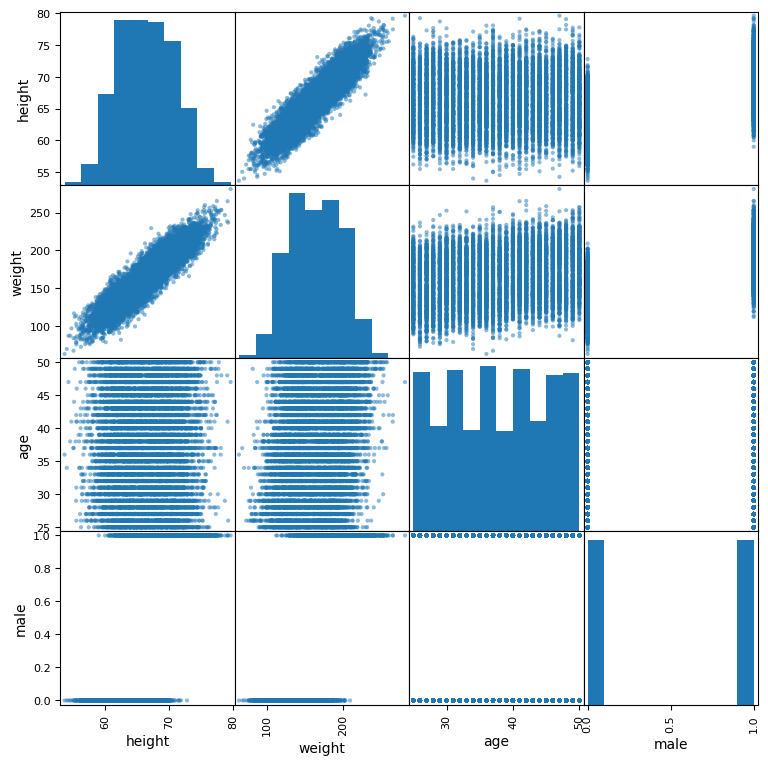


height    0.760690
weight    0.785218
age       0.004750
Name: male, dtype: float64


In [19]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'height_weight.csv')

pd.plotting.scatter_matrix(df, figsize = (9, 9))
plt.show()
print()

corr_mat = df.corr()
male_corr = corr_mat.loc['male', ['height', 'weight', 'age']]
print(male_corr)

### Sprint 4: Capitulo 5.5 - Gráficos de líneas

         date       open      close    volume
0  2015-01-02  41.064999  40.720001   6886000
1  2015-01-05  40.070000  39.939999  11623800
2  2015-01-06  40.169998  39.615002   7664400
3  2015-01-07  39.875000  40.590000   9732600
4  2015-01-08  41.165001  41.244999  13170600

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   open    1258 non-null   float64
 2   close   1258 non-null   float64
 3   volume  1258 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 39.4+ KB


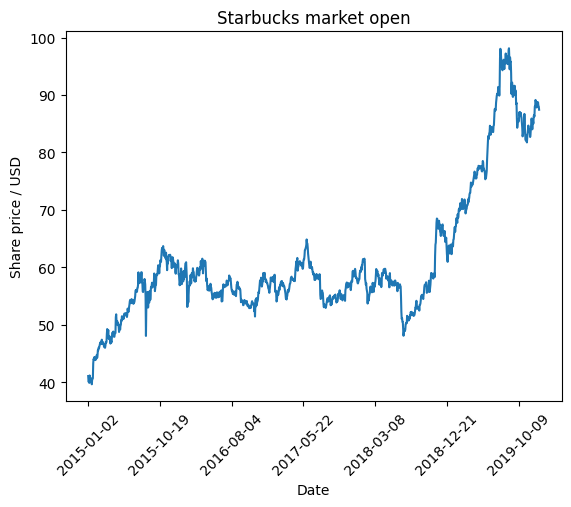

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'sbux.csv')

print(df.head())
print()
df.info()

df.plot(x='date',
        y='open',
        legend=False,
        title='Starbucks market open',
        xlabel='Date',
        ylabel='Share price / USD',
        rot=45)
plt.show()

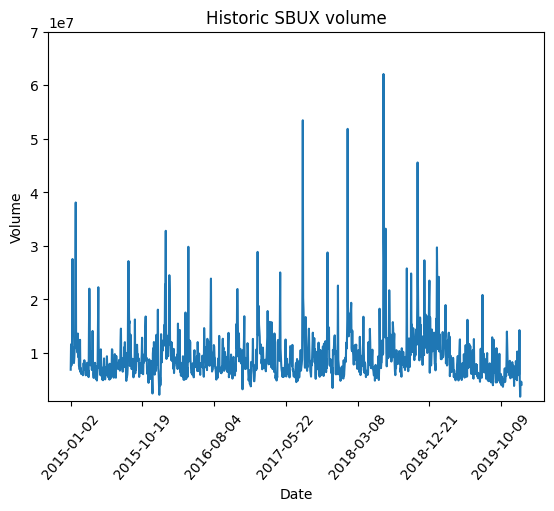

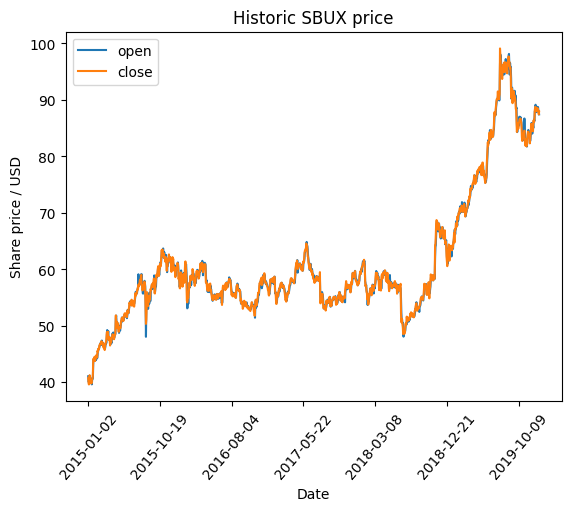

In [21]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'sbux.csv')

df.plot(x = 'date',
        y = 'volume',
        title = 'Historic SBUX volume',
        xlabel = 'Date',
        ylabel = 'Volume',
        rot = 50,
        ylim = [1e6, 7e7],
        legend = False)

plt.show()

cols = ['open', 'close']
df.plot(x = 'date',
        y = cols,
        title = 'Historic SBUX price',
        xlabel = 'Date',
        ylabel = 'Share price / USD',
        rot = 50)
plt.show()

### Sprint 4: Capitulo 5.6 - Gráficos de barras

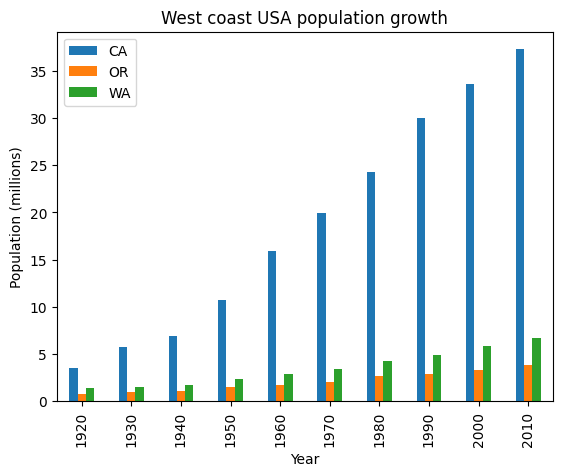

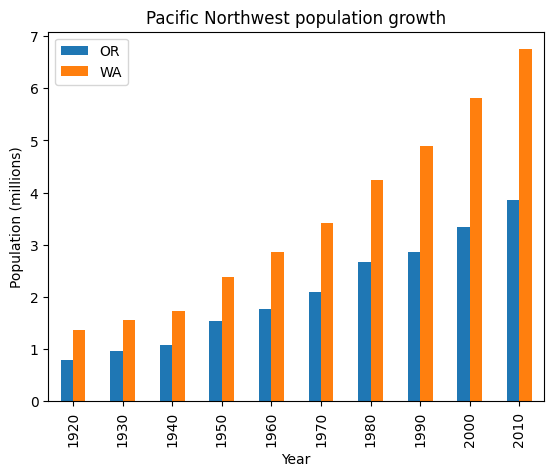

In [22]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'west_coast_pop.csv')

df.plot(x='year',
        kind='bar',
        title='West coast USA population growth',
        xlabel='Year',
        ylabel='Population (millions)')

plt.legend(['CA', 'OR', 'WA'])
plt.show()

cols = ['or_pop', 'wa_pop']
df.plot.bar(x = 'year', 
        y = cols,
        title = 'Pacific Northwest population growth',
        xlabel = 'Year',
        ylabel = 'Population (millions)')

plt.legend(['OR', 'WA'])
plt.show()

### Sprint 4: Capitulo 5.7 - Histogramas

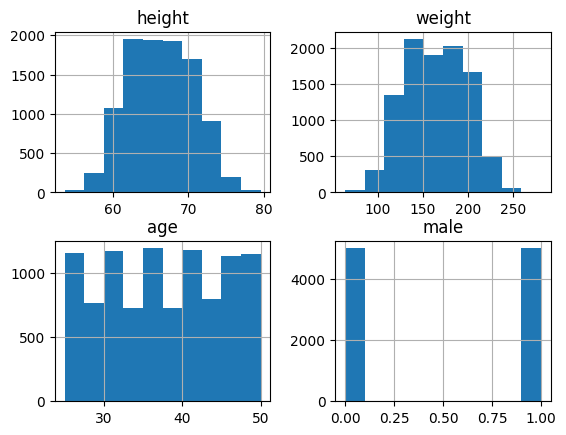

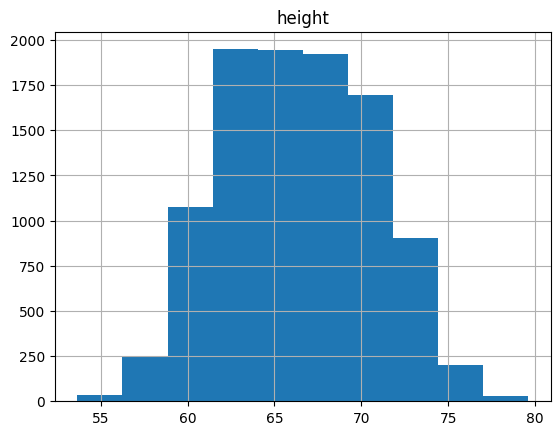

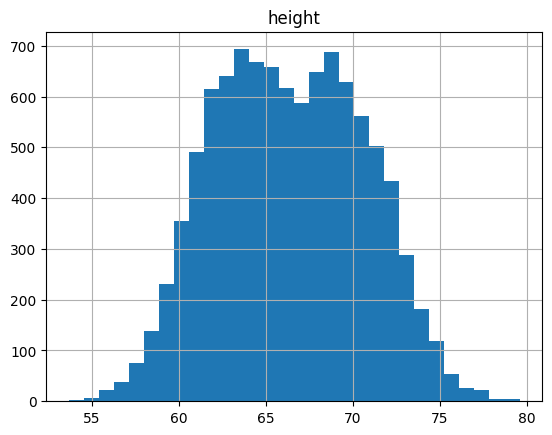

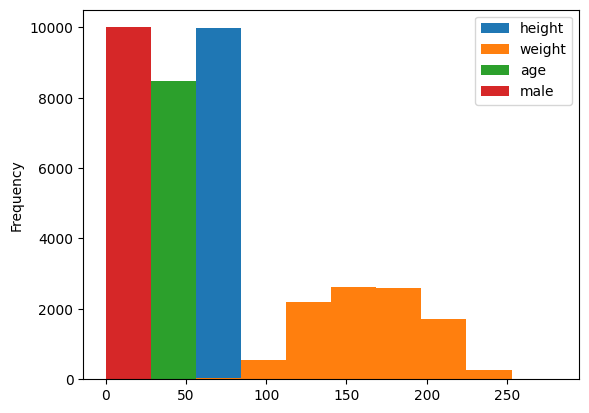

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'height_weight.csv')
df.hist()
plt.show()

df.hist(column='height')
plt.show()

#Alternativa
#df['height'].hist()

df.hist(column='height', bins=30)
plt.show()

#Sin cuadricula
#df['height'].plot(kind='hist', bins=30)
#Con cuadricula
#df['height'].hist(bins = 30)

df.plot(kind='hist')
plt.show()

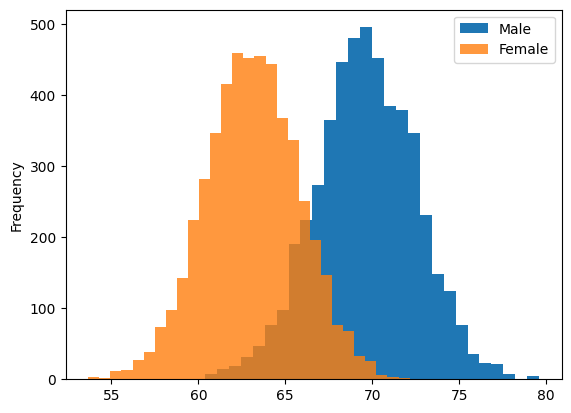

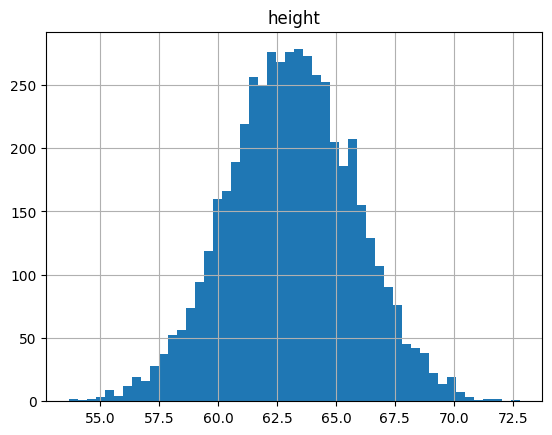

In [24]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'height_weight.csv')

# esto mostrará el gráfico de hombres
df[df['male'] == 1]['height'].plot(kind='hist', bins=30)

# esto mostrará el gráfico de mujeres
# e incluye un valor alpha para que podamos ver ambos histogramas por completo
df[df['male'] == 0]['height'].plot(kind='hist', bins=30, alpha=0.8)

plt.legend(['Male', 'Female']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.show()

df = df.sort_values('male').reset_index(drop=True)
df = df[df.index < 5000]
df.hist(column='height', bins=50)
plt.show()

       height      weight  age  male
1   69.131220  203.525148   44     1
2   67.710271  205.752354   42     1
4   72.967492  229.394555   49     1
7   65.841637  153.223697   32     1
9   71.412162  217.293370   41     1
10  69.897292  198.358761   35     1
11  73.565880  213.624893   44     1
12  72.257660  205.426256   32     1
17  73.197663  206.095540   34     1
18  69.573423  170.285228   45     1
19  68.833304  182.614111   39     1
21  70.109852  204.223197   40     1
22  69.829679  196.218640   33     1
23  70.205883  188.531900   32     1
29  64.552928  165.771475   37     1
30  71.549770  215.256851   50     1
31  72.674776  196.046634   32     1
33  71.769447  206.330596   46     1
35  67.157357  154.372626   31     1
36  70.758278  201.534178   33     1

La suma de las longitudes del dataframe: 10000
Edad mínima y máxima para df_20s: 25 29
Edad mínima y máxima para df_20s: 30 39
Edad mínima y máxima para df_20s: 40 50


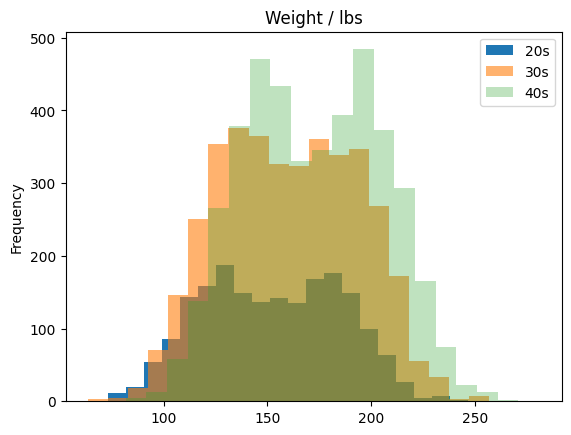

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv(pc_path + 'height_weight.csv')

print(df[df.male == 1].head(20))
print()

df_20s = df[df.age < 30]
df_30s = df[(df['age'] >= 30) & (df['age'] < 40)]
df_40s = df[df.age >= 40]

# print out the results
print("La suma de las longitudes del dataframe:", len(df_20s + df_30s + df_40s))
#print("Edad mínima y máxima para df_20s:", df_20s['age'].agg(['min', 'max']))
print("Edad mínima y máxima para df_20s:", min(df_20s['age']), max(df_20s['age']))
#print("Edad mínima y máxima para df_30s:", df_30s['age'].agg(['min', 'max']))
print("Edad mínima y máxima para df_20s:", min(df_30s['age']), max(df_30s['age']))
#print("Edad mínima y máxima para df_40s:", df_40s['age'].agg(['min', 'max']))
print("Edad mínima y máxima para df_20s:", min(df_40s['age']), max(df_40s['age']))

df_20s['weight'].plot(kind = 'hist',
                      bins = 20,
                      title = 'Weight / lbs',
                      ylabel = 'Frequency')

df_30s['weight'].plot(kind = 'hist',
                      bins = 20,
                      alpha = 0.60)

df_40s['weight'].plot(kind = 'hist',
                      bins = 20,
                      alpha = 0.3)

plt.legend(["20s", "30s", "40s"])
plt.show()
